
Perform analysis on the transferability score 


In [1]:
import matplotlib.pyplot as plt
from math import log
import os
import pandas as pd
from statistics import median

In [2]:
"""
Color map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score

Wasserstein distance is calculated as the final step error from Sinkhorn OT
"""


'\nColor map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score\n\nWasserstein distance is calculated as the final step error from Sinkhorn OT\n'

In [3]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/mimic")
print(f"Will save outputs to {output_dir}")
summary_path = os.path.join(output_dir, "selected_summary_mimic.csv")
summary_df = pd.read_csv(summary_path, header=0, index_col=0)
label_codes = list(summary_df.index)


Will save outputs to /home/wanxinli/deep_patient/outputs/mimic


In [18]:
""" 
Read each label score file
"""

stat_df = pd.DataFrame(columns=['label_code','trans_source_f1', 'source_f1', 'transfer_score','w_dist'])
stat_df = stat_df.set_index('label_code')

ret = []
transfer_scores = []
w_dists = []
trans_source_f1s = []
source_f1s = []
for code in label_codes:
    code_path = os.path.join(output_dir, "exp3_"+code+"_score.csv")
    code_df = pd.read_csv(code_path, header=0, index_col=0)
    stat_df.at[code, 'transfer_score'] = median(list(code_df['transfer_score']))
    stat_df.at[code, 'w_dist'] = median(list(code_df['w_dist']))
    stat_df.at[code, 'trans_source_f1'] = median(list(code_df['trans_source_f1']))
    transfer_scores.extend(list(code_df['transfer_score']))
    w_dists.extend(list(code_df['w_dist']))
    trans_source_f1s.extend(list(code_df['trans_source_f1']))
    source_f1s.extend(list(code_df['source_f1']))


In [5]:
stat_df.shape

(276, 3)

In [6]:
# plt.figure()
# plt.scatter(list(stat_df['w_dist']), list(stat_df['trans_source_f1']), s=1)
# plt.xlabel('Wasserstein distance')
# plt.ylabel('f1 score')
# plt.show()

In [19]:
delta_f1s = [x-y for x, y in zip(trans_source_f1s, source_f1s)]
delta_f1s

[0.014836633393334298,
 0.0466850380936944,
 0.03574561403508769,
 -0.033226416646105816,
 0.023986765922249798,
 0.05970384787354355,
 -0.03191489361702138,
 0.056202585746340294,
 0.017955645615220117,
 0.03565062388591811,
 0.035568852322778954,
 -0.05627147766323015,
 0.006750471735721741,
 0.01563178462874526,
 0.05548027102431241,
 -0.020196679708152643,
 -0.009321217486395805,
 -0.010416666666666519,
 0.05780702982775521,
 0.0509337860780984,
 0.003024193548387011,
 -0.0018501387604070718,
 -0.005781923307696446,
 0.03674915397631129,
 -0.05199049316696369,
 0.04150364809136087,
 0.0347394540942928,
 -0.008797653958944274,
 -0.022952033423237594,
 0.051944505134367436,
 0.007332205301748385,
 -0.04232804232804244,
 -0.06537843858467596,
 0.0777832324224077,
 -0.042931162102146536,
 -0.014214795323223894,
 -0.03450452345886801,
 0.027923211169284423,
 0.03684903177288945,
 0.030612244897959107,
 0.025835986213791462,
 -0.001919017463059003,
 -0.06250000000000011,
 -0.043291865021

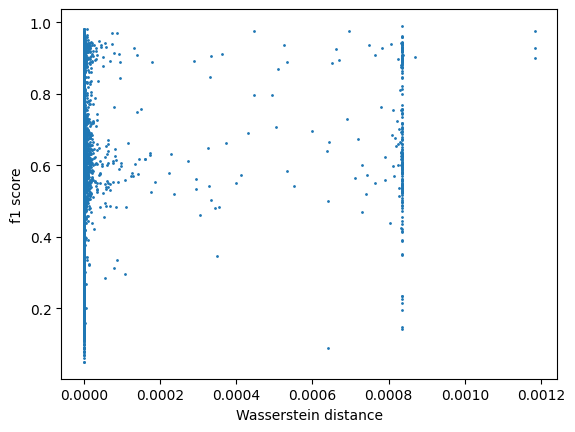

In [7]:
plt.figure()
plt.scatter(w_dists, trans_source_f1s, s=1)
plt.xlabel('Wasserstein distance')
plt.ylabel('f1 score')
plt.show()

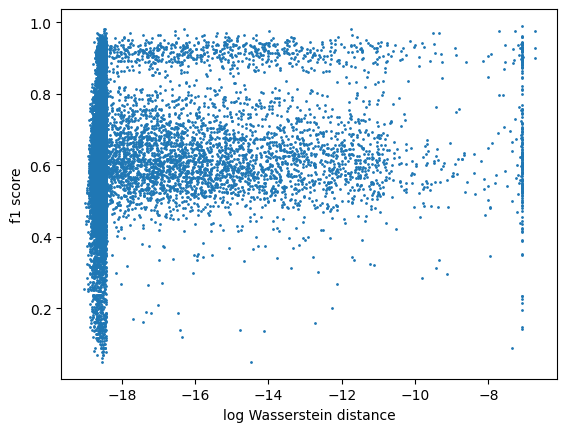

In [9]:
log_w_dists = [log(x) for x in w_dists]
plt.figure()
plt.scatter(log_w_dists, trans_source_f1s, s=1)
plt.xlabel('log Wasserstein distance')
plt.ylabel('f1 score')
plt.show()

In [26]:
# plt.figure()
# plt.scatter(list(stat_df['transfer_score']), list(stat_df['trans_source_f1']), s=1)
# plt.xlabel('transfer score')
# plt.ylabel('f1 score')
# plt.show()

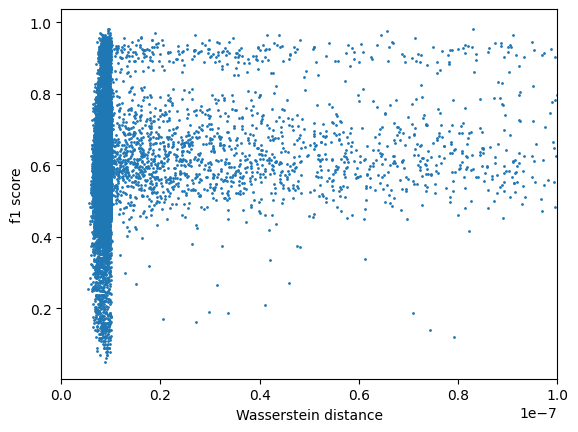

In [10]:
plt.figure()
plt.scatter(w_dists, trans_source_f1s, s=1)
plt.xlabel('Wasserstein distance')
plt.ylabel('f1 score')
plt.xlim(0.00000, 1e-7)
plt.show()

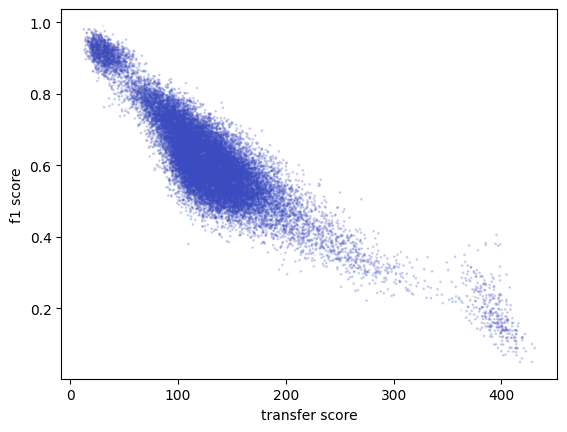

In [17]:
plt.figure()
plt.scatter(transfer_scores, trans_source_f1s, s=1, c=w_dists, cmap=plt.cm.coolwarm)
plt.xlabel('transfer score')
plt.ylabel('f1 score')
plt.show()
# TODO: consider sort by w_dists

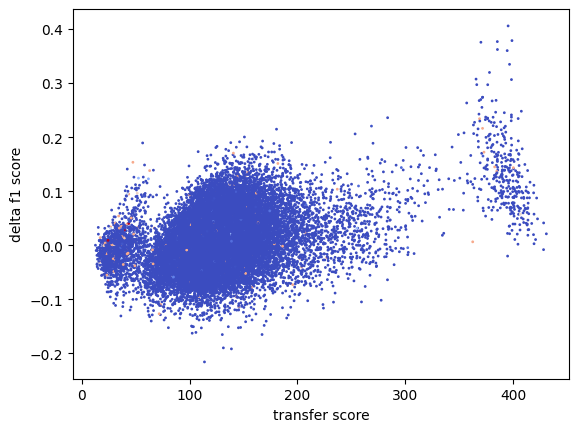

In [20]:
plt.figure()
plt.scatter(transfer_scores, delta_f1s, s=1, c=w_dists, cmap=plt.cm.coolwarm)
plt.xlabel('transfer score')
plt.ylabel('delta f1 score')
plt.show()
# TODO: consider sort by w_dists

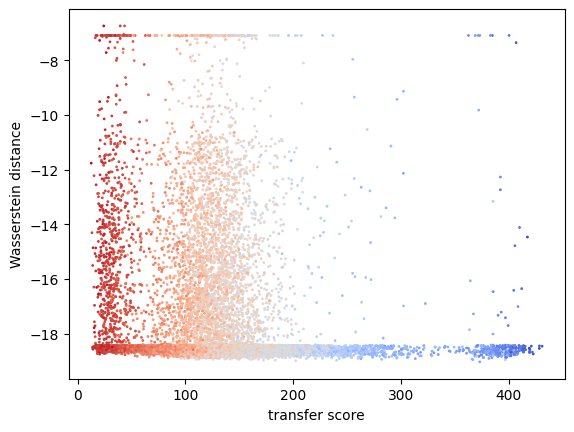

In [14]:
# plt.ylim(0.75*1e-8, 1.25*1e-8)
# plt.scatter(list(stat_df['transfer_score']), list(stat_df['w_dist']), s=1, c=list(stat_df['trans_source_f1']), cmap=plt.cm.coolwarm)
plt.figure()
plt.scatter(transfer_scores, log_w_dists, s=1, c=trans_source_f1s, cmap=plt.cm.coolwarm)
# warmer color indicates better f1
plt.xlabel('transfer score')
plt.ylabel('Wasserstein distance')

plt.show()

In [12]:
inverse_transfer_scores = [1/x for x in transfer_scores]
inverse_w_dists = [1/x for x in w_dists]

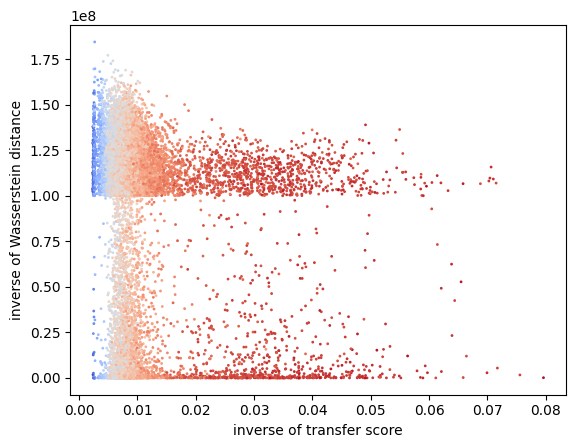

In [ ]:
# plt.ylim(0.75*1e-8, 1.25*1e-8)
# plt.scatter(list(stat_df['transfer_score']), list(stat_df['w_dist']), s=1, c=list(stat_df['trans_source_f1']), cmap=plt.cm.coolwarm)
plt.figure()
plt.scatter(inverse_transfer_scores,inverse_w_dists, s=1, c=trans_source_f1s, cmap=plt.cm.coolwarm)
# warmer color indicates better f1
plt.xlabel('inverse of transfer score')
plt.ylabel('inverse of Wasserstein distance')

plt.show()